In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import h5py
from second_cumulant import second_cumulant, all_second_cumulants
from file_to_field import all_fields_from_file

# Getting Data from DNS to CE2

First step is to extract all fields from DNS, create Dedalus fields:

In [4]:
#filename = 'scratch/busse_annulus_ra7.60e+04_beta2.80e+03_C0.00e+00_Pr1.00e+00_filter5.00e-01_nx256_ny64_CFL/snapshots/snapshots_s1.h5'
filename = 'scratch/busse_annulus_ra1.00e+08_beta7.07e+05_C3.16e-01_Pr1.00e+00_filter5.00e-01_nx512_ny256_CFL_xy/snapshots/snapshots_s1.h5'

In [5]:
df = h5py.File(filename,'r')

This function allows us to do that.

Note that here, I've used a DNS run with the `--xy` flag, so it's 

```
['Fourier', 'SinCos'] # for x, y
```
instead of the other way around. Be careful, very few DNS runs have this option. If you want to start a CE2 run from a DNS output, you have to re-run the DNS with `--xy`.

In [6]:
fields = all_fields_from_file(filename,['Fourier', 'SinCos'], meta={'y':{'constant': False, 'parity': -1}})

All we need are $\psi$ and $\Theta$:

In [7]:
psi, theta = fields[0:2]

Now, we can test taking the second cumulant for just a single $y$ index (note that this takes either an int, in which case it takes the second cumulant with regard to a given grid cell, or a float in which case it interpolates to that $y$ position).

In [8]:
theta_2c = second_cumulant(31, theta,layout='xy')

/home/joishi/miniconda3/envs/dedalus/lib/python3.7/site-packages/dedalus/core/distributor.py:334: ComplexWarning: Casting complex values to real discards the imaginary part
  gdata[:] = cdata[axslice(self.axis, 0, 1)]


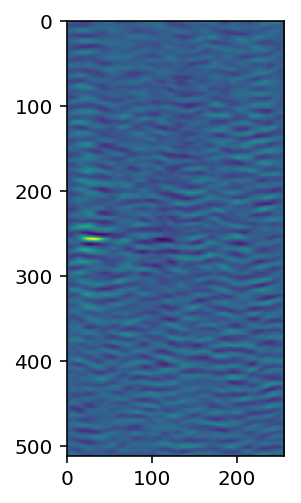

In [9]:
plt.imshow(theta_2c)

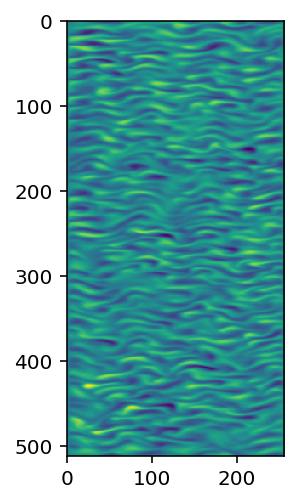

In [10]:
plt.imshow(theta['g'])

Calculate the full second cumulant.

In [11]:
ctt = all_second_cumulants(theta,layout='xy')

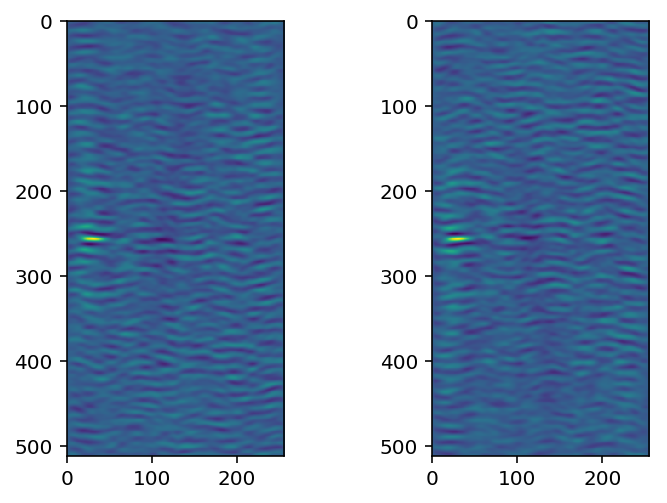

In [17]:
plt.subplot(121)
plt.imshow(ctt[:,:,31])
plt.subplot(122)
plt.imshow(ctt[:,31,:])

<strike>This is $c_{\theta \theta}(y_1, y_2, \xi)$. Unfortunately, we need $c_{\theta \theta}(\xi, y_1, y_2)$ to feed into CE2.</strike>

Update: I gave an option to the DNS code to swap x and y in the domain, so we can just get what we want without fucking around.

(512, 256, 256)